In [34]:
import pandas as pd
salaries = pd.read_csv("datascience_salaries.csv")
print(salaries.head())
print(salaries.info())

   Unnamed: 0       job_title   job_type experience_level       location  \
0           0  Data scientist  Full Time           Senior  New York City   
1           2  Data scientist  Full Time           Senior         Boston   
2           3  Data scientist  Full Time           Senior         London   
3           4  Data scientist  Full Time           Senior         Boston   
4           5  Data scientist  Full Time           Senior  New York City   

  salary_currency  salary  
0             USD  149000  
1             USD  120000  
2             USD   68000  
3             USD  120000  
4             USD  149000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   

In [35]:
salaries.isnull().sum()

Unnamed: 0          0
job_title           0
job_type            0
experience_level    0
location            0
salary_currency     0
salary              0
dtype: int64

In [36]:
salaries['job_title'].unique()

array(['Data scientist', 'Data analyst', 'Big data', 'Machine learning',
       'ML Ops'], dtype=object)

In [37]:
salaries['job_type'].unique()

array(['Full Time', 'Internship'], dtype=object)

In [38]:
salaries['experience_level'].unique()

array(['Senior', 'Entry', 'Mid', 'Executive'], dtype=object)

In [39]:
salaries['salary_currency'].unique()

array(['USD', 'EUR', 'GBP'], dtype=object)

In [40]:
salaries['salary'].describe()

count      1171.000000
mean      64836.037575
std       32551.767046
min       30000.000000
25%       45000.000000
50%       63000.000000
75%       68000.000000
max      228000.000000
Name: salary, dtype: float64

In [41]:
import requests

url_eur = "https://api.frankfurter.app/latest?from=EUR&to=USD"
response_eur = requests.get(url_eur).json()
eur_usd = response_eur['rates']['USD']

print(eur_usd)

1.1744


In [42]:
url_gbp = "https://api.frankfurter.app/latest?from=GBP&to=USD"
response_gbp = requests.get(url_gbp).json()
gbp_usd = response_gbp['rates']['USD']

print(gbp_usd)

1.3557


In [43]:
rates_to_usd = {
    'USD': 1,
    'EUR': eur_usd,
    'GBP': gbp_usd
}

salaries['usd_salary'] = salaries.apply(
    lambda row: row['salary'] * rates_to_usd[row['salary_currency']],
    axis=1
)

print(salaries.head())

   Unnamed: 0       job_title   job_type experience_level       location  \
0           0  Data scientist  Full Time           Senior  New York City   
1           2  Data scientist  Full Time           Senior         Boston   
2           3  Data scientist  Full Time           Senior         London   
3           4  Data scientist  Full Time           Senior         Boston   
4           5  Data scientist  Full Time           Senior  New York City   

  salary_currency  salary  usd_salary  
0             USD  149000    149000.0  
1             USD  120000    120000.0  
2             USD   68000     68000.0  
3             USD  120000    120000.0  
4             USD  149000    149000.0  


In [44]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
salaries['usd_salary_scaled'] = mm_scaler.fit_transform(salaries[['usd_salary']])

salaries[['usd_salary_scaled']].describe()



,usd_salary_scaled
count,1171.000000
mean,0.176646
std,0.164266
min,0.000000
25%,0.075758
50%,0.166667
75%,0.191919
max,1.000000


In [45]:
salaries_encoded = pd.get_dummies(salaries, columns=['job_title', 'job_type', 'experience_level', 'location', 'salary_currency'], drop_first=True)
salaries_encoded.head()

,Unnamed: 0,salary,usd_salary,usd_salary_scaled,job_title_Data analyst,job_title_Data scientist,job_title_ML Ops,job_title_Machine learning,job_type_Internship,experience_level_Executive,...,location_Wien,location_Wilmington,location_Work from Home,location_Wrocław,location_Zurich,location_tel aviv,location_České Budějovice,location_İstanbul,salary_currency_GBP,salary_currency_USD
0,0,149000,149000.0,0.601010,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,120000,120000.0,0.454545,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3,68000,68000.0,0.191919,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,120000,120000.0,0.454545,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,149000,149000.0,0.601010,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [46]:
from sklearn.decomposition import PCA

X = salaries_encoded.drop(columns=['usd_salary'])  

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

salaries_reduced = pd.DataFrame({
    'usd_salary': salaries['usd_salary'],
    'experience_level': salaries['experience_level'],
    'PC1': X_pca[:,0],
    'PC2': X_pca[:,1]
})

salaries_reduced.head()

,usd_salary,experience_level,PC1,PC2
0,149000.0,Senior,84163.766084,-949.193386
1,120000.0,Senior,55163.767133,-941.138557
2,68000.0,Senior,3163.768475,-929.281609
3,120000.0,Senior,55163.767551,-939.138558
4,149000.0,Senior,84163.767127,-944.193388


In [56]:
agg = salaries_reduced.groupby('experience_level')['usd_salary'].agg(['mean','median','count']).reset_index()
agg

,experience_level,mean,median,count
0,Entry,36111.111111,30000.0,126
1,Executive,76076.923077,46000.0,13
2,Mid,52076.054754,51000.0,305
3,Senior,75191.966575,68000.0,727


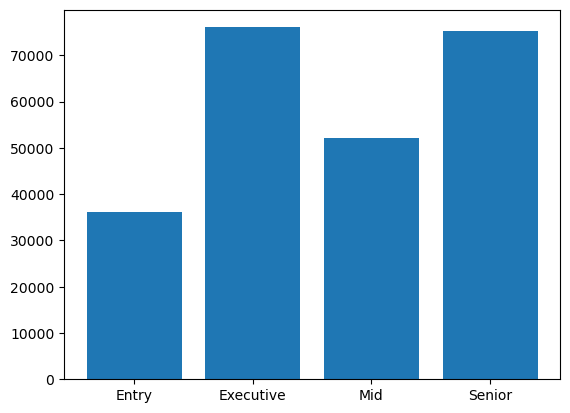

In [57]:
import matplotlib.pyplot as plt
agg = salaries_reduced.groupby('experience_level')['usd_salary'].mean().reset_index()
plt.bar(agg['experience_level'], agg['usd_salary'])
plt.show()